<h1 style="color: #001a79;">Exercise</h1>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use numpy's polyfit to fit polynomials to the 2 datasets in the next jupyter cell.

In [1]:
# for numerical operations
import numpy as np

# dataset 1
x1 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])
y1 = np.array([1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7])

# dataset 2
x2 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
y2 = np.array([5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6])

In [2]:
# import libraries...

# Optimization of cost functions
import scipy.optimize as so
import scipy.stats as ss

# for generation of qq plot
import statsmodels.api as sm
import pylab as py

# for durbin watson test
from statsmodels.stats.stattools import durbin_watson

# for auto-correlation plot
from statsmodels.graphics import tsaplots

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# format plots
sns.set_style("darkgrid")

<h2 style="color: #001a79;">Plotting the datasets</h2>

<hr style="border-top: 1px solid #001a79;" />

First lets make a function that returns the predicted y-values for the passed x and y-actual values for n degrees of freedom. This function will leverage the *polyfit* method of numpy to get an array of polynomial coefficients from the highest to lowest power. These coefficients will then be passed to numpys *polyval* method along with the predictor values to return the predicted y_values for each dataset.

In [3]:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

def get_y_pred(x, y, df):
    '''returns polynomial y-predicted vals for passed x, y and degrees of freedrom'''
    # get polynomial coeffecients from high to lowest order
    params = np.polyfit(x, y, df)
    
    # return predicted y-values using coefficients and x as predictor vals
    return np.polyval(params, x)

In [4]:
# sanity check...return y_pred_vals
get_y_pred(x1, y1, 2)

array([ 137.31262255,   29.01183824,  -34.26860294,  -52.52870098,
        -25.76845588,   46.01213235,  162.81306373,  324.63433824,
        531.47595588,  783.33791667, 1080.22022059, 1422.12286765,
       1809.04585784, 2240.98919118, 2717.95286765, 3239.93688725])

In [5]:
def plot_grid(plot_idx, plot_data, plot_label):
    '''This function plots a 2x2 matrix on a pre-existing figure object'''
    
    # pull out x, y and degrees of freedom vals
    x, y, df = plot_data[0], plot_data[1], plot_data[2]

    # get predicted y polynomial vals from passed degrees of freedom
    y_pred = get_y_pred(x, y, df = df)
    
    # Plot x and y  &  x and y_pred
    axs[plot_idx].plot(x, y, 'r.')  
    axs[plot_idx].plot(x, y_pred, 'k--')  
    
    # add title to plots
    axs[plot_idx].set_title(plot_label)

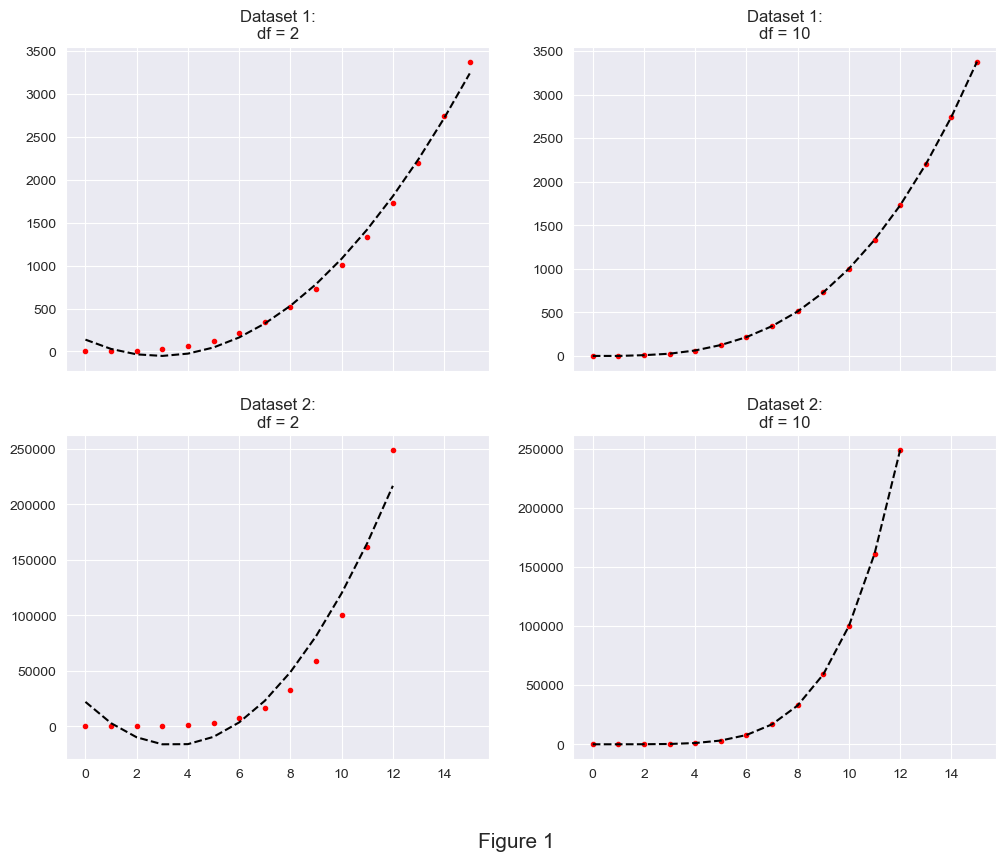

In [6]:
# lets structure the data for passing to plot grid function...

# each list element is a tuple containing x, y and degrees of freedom
plot_list = [(x1, y1, 2), (x1, y1, 10), (x2, y2, 2), (x2, y2, 10)]

# contains the title for each subplot
plot_labels = ['Dataset 1:\ndf = 2', 'Dataset 1:\ndf = 10',
               'Dataset 2:\ndf = 2', 'Dataset 2:\ndf = 10']

# generate figure with 2 rows & 2 cols
fig, axs = plt.subplots(2, 2, sharex=True, figsize = (12, 8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.2, top = 1)
plt.figtext(0.5, 0, 'Figure 1', wrap = True, horizontalalignment = 
            'center', fontsize = 15);

# generate 2d (2 x 2) array  
arr = np.arange(8).reshape(2, 2, 2)

# iterate over 2d array to get tuple of indices and index val
for index, indices in enumerate(np.ndindex(arr.shape[:2])):
    plot_grid(indices, plot_list[index], plot_labels[index])   

First lets look at the top two plots (dataset 1). We can clearly see that the 10th order polynomial model fits the line better to the data than the 2nd order model, thats not to say that it's a better model as we must be careful not to overfit the data. Overfitting is when the model is reliant on the training data. Rajbangshi (2022) describes this well by detailing how an overfitted model memorizes the training data instead of learning and understanding the underlying trend of the data [1]. The bottom two plots (dataset 2) unsurprisingly also shows a better fit for 10 degrees of freedom. Lets explore how we bridge the gap between getting a good curve fit and overfitting the model.

<h2 style="color: #001a79;">Bridging the Gap</h2>

<hr style="border-top: 1px solid #001a79;" />

Were going to use the Bayesian information criterion and RMSE to evalute what model order will work best for datset 1 and 2... explain this more

In [8]:
# lets try and manually calculate  Bayesian information criterion for dataset 1
# method adoped here: https://pypi.org/project/RegscorePy/

n = len(y1)
for df in range(10):
    # return coeffecients, rss and other data we dont need
    params = np.polyfit(x1, y1, df, full = True)
    
    # pull out RSS from params
    rss = params[1]
    
    # calculate bic and append to bic manual list
    bic = (n * np.log(rss) + df * np.log(n))
    print(bic)

[266.87157012]
[241.3155778]
[188.09589478]
[49.6191395]
[52.3850042]
[54.68039259]
[54.89362207]
[56.75705935]
[59.44176869]
[61.86137634]


In [97]:
# we can also use sk learn to help us calculate bic
# method adapted from: https://swapnilin.medium.com/bayesian-information-criterion-bic-aa0400f9c533
def calc_bic(x, y, max_df):
    '''returns bic list, order list and rmse list from 
    passed x and y vals to passed degrees of freedom'''
    
    bic = []        # Bayesian information criterion
    order = []      # model order list
    rmse = []       # root mean squared error list
    
    # put all x and y vals into dict for both datasets
    plot_vars = {'x': x, 'y': y}
    
    # convert dict to dataframe for sklearn operations
    dframe = pd.DataFrame.from_dict(plot_vars)
    
    # seperate out x and y
    x, y = dframe[['x']], dframe[['y']] 
    
    for df in range(max_df):

        # calculate root mean squared error and append to list  
        mse = mean_squared_error(y, get_y_pred(plot_vars.get('x'), y, df))
        
        # square mse and append to rsme list
        #rmse.append(np.square(mse))
        rmse.append(mse)

        # calculate bic
        pf = PolynomialFeatures(degree = df)
        xn = pf.fit_transform(x)
        model2 = sm.OLS(y, xn).fit()
        bic.append(model2.bic)
        order.append(df)
        
    return bic, order, rmse

In [100]:
bic_d1, orderd1, rmse1 = calc_bic(x1, y1, max_df = 10)
bic_d2, orderd2, rmse2, = calc_bic(x2, y2, max_df = 10)

# compare bic to manual calc above
rmse1

[1095678.5508984374,
 186530.13659283082,
 5635.443407322294,
 0.8259236946296906,
 0.8255766719010764,
 0.8013173957590511,
 0.6828649883156775,
 0.6451450662424945,
 0.641611345011607,
 0.6276115485524649]

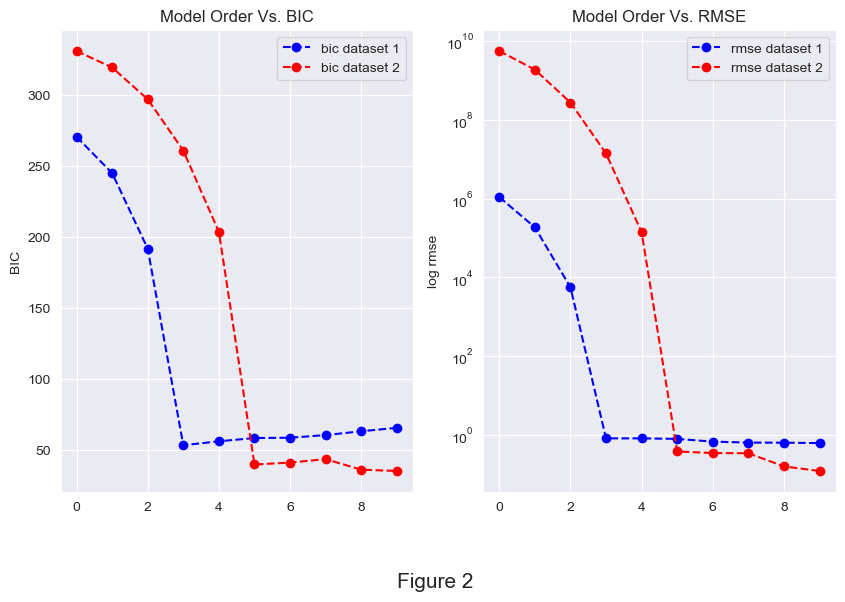

In [110]:
# plot bic vs rmse
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
plt.figtext(0.5, -0.05, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot histgram
ax1.plot(orderd1, bic_d1, '--bo', label = 'bic dataset 1')
ax1.plot(orderd2, bic_d2, '--ro', label = 'bic dataset 2')

ax2.plot(orderd1, rmse1, '--bo', label = 'rmse dataset 1')
ax2.plot(orderd2, rmse2, '--ro', label = 'rmse dataset 2')

# set axis to log scale for better visual
ax2.set_yscale('log')

# format plot
ax1.set_title("Model Order Vs. BIC")
ax2.set_title("Model Order Vs. RMSE")
ax1.set_ylabel('BIC')
ax2.set_ylabel('log rmse')
ax1.legend()
ax2.legend()
plt.show();

We can see from Figure 2 that... explain this more...

<h2 style="color: #001a79;">References</h2>

<hr style="border-top: 1px solid #001a79;" />

1. Rajbangshi, A, 2020, Overfitting and Underfitting in Machine Learning, medium.com, Available at [Ref Link](https://medium.com/analytics-vidhya/overfitting-and-underfitting-in-machine-learning-d829d8501335) (Accessed 10 November 2022). 

<br>

2. Klassen, M, 2020, An Intuitive Explanation of the Bayesian Information Criterion, towards data science, Available at [Ref Link](https://towardsdatascience.com/an-intuitive-explanation-of-the-bayesian-information-criterion-71a7a3d3a5c5) (Accessed 11 November 2022).


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>